In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import numpy as np

In [2]:
file = "../models/trained_model/PytorchWideEnsemble10RegressorModel/train_meta_subset_1_1_2017_run_15.p"

In [3]:
meta = pickle.load(open(file, "rb"))

In [4]:
loss_keys = [x for x in meta.keys() if x.startswith('train_loss')]
loss_keys

['train_loss_0',
 'train_loss_1',
 'train_loss_2',
 'train_loss_3',
 'train_loss_4',
 'train_loss_5',
 'train_loss_6',
 'train_loss_7',
 'train_loss_8',
 'train_loss_9']

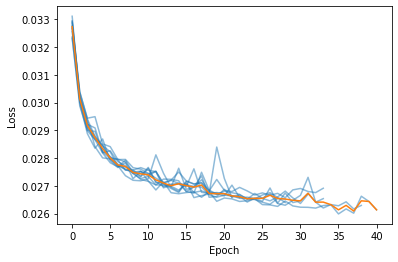

In [7]:
for k in loss_keys:
    plt.plot(meta[k], c='tab:blue', alpha=0.5)
    
i = 0
meds = []
while True:
    m = []
    for k in loss_keys:
        if i < len(meta[k]):
            m.append(meta[k][i])
    if len(m)==0:
        break
    med = np.median(m)
    meds.append(med)
    i += 1
    
plt.plot(meds, c='tab:orange', alpha=1)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('ensemble_loss.pdf', bbox_inches='tight', pad_inches=0)